In [107]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.utils.class_weight import compute_class_weight

import optuna

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
seed = np.random.seed(777)

In [124]:
embeddings = pd.read_csv('../embeddings/W2V_Embeddings_full.csv')
embeddings.head()

,Unnamed: 0,req_text,age,age_encoded,word_tokens,lemma,w2v_embeddings,0,1,2,...,190,191,192,193,194,195,196,197,198,199
0,0,quantos empregados em cada um dos atuais níve...,a2,1,"['quantos', 'empregados', 'em', 'cada', 'um', ...",quanto empregado em cada um de o atual nível s...,[ 1.25785102e-03 -1.59721210e-04 7.59971736e-...,0.001258,-0.000160,0.000076,...,0.000542,0.000067,-0.001371,-0.001145,0.001311,0.001010,0.000784,-0.001450,-0.000183,-0.000933
1,1,solicito cópia das atas do conselho de admini...,a2,1,"['solicito', 'cópia', 'das', 'atas', 'do', 'co...",solicito cópia de o ata de o conselho de admin...,[ 1.11805391e-03 -1.34598173e-04 4.17785224e-...,0.001118,-0.000135,0.000418,...,0.001067,0.000445,-0.001352,-0.001493,0.001146,0.001347,0.000644,-0.001100,-0.000065,-0.000674
2,2,solicito informar a norma lei decreto portari...,a2,1,"['solicito', 'informar', 'a', 'norma', 'lei', ...",solicito informar o norma lei decreto portaria...,[ 1.32721674e-03 -6.32910349e-04 3.62002029e-...,0.001327,-0.000633,0.000362,...,0.000936,-0.000007,-0.001224,-0.000946,0.001299,0.001010,0.000490,-0.001523,-0.000188,-0.001091
3,3,solicito por gentileza a informação sobre a q...,a2,1,"['solicito', 'por', 'gentileza', 'a', 'informa...",solicito por gentileza o informação sobre o qu...,[ 1.1066387e-03 -1.0445345e-04 3.3743048e-04 ...,0.001107,-0.000104,0.000337,...,0.000794,0.000169,-0.001312,-0.001441,0.000919,0.001189,0.000863,-0.001287,-0.000390,-0.000561
4,4,solicito por gentileza a informação sobre a q...,a2,1,"['solicito', 'por', 'gentileza', 'a', 'informa...",solicito por gentileza o informação sobre o qu...,[ 1.14656042e-03 -1.44141202e-04 2.36450564e-...,0.001147,-0.000144,0.000236,...,0.000841,0.000188,-0.001445,-0.001300,0.000967,0.001169,0.000776,-0.001339,-0.000236,-0.000677


In [125]:
labels = ['0','1','2','3']
columns = [str(i) for i in range(200)]
X = embeddings[columns]
y = np.array(embeddings['age_encoded'])

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, stratify=y, random_state=seed)

In [127]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

In [119]:
RF_std = RandomForestClassifier(class_weight=dict(enumerate(class_weights)))

scores = cross_val_score(RF_std, X_train, y_train, cv=10)

print(scores)

print(scores.mean())

[0.38719512 0.38262195 0.38871951 0.37652439 0.38414634 0.33689024
 0.37957317 0.38719512 0.39786585 0.36585366]
0.37865853658536586


In [128]:
RF_bst = RandomForestClassifier(class_weight=dict(enumerate(class_weights)))
RF_bst.fit(X_train, y_train)

RF_y_pred = RF_bst.predict(X_test)

accuracy_score(y_test, RF_y_pred)

0.3603658536585366

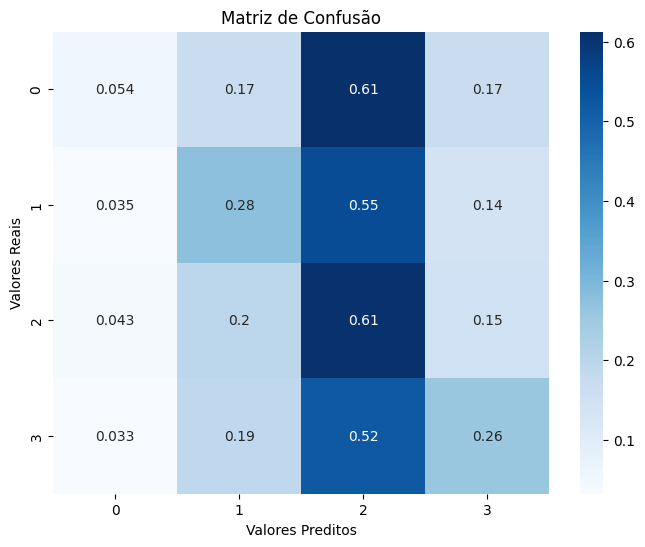

In [129]:
cm_RF = confusion_matrix(y_test, RF_y_pred)

cm_RF = cm_RF.astype('float') / cm_RF.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_RF, annot=True, cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()